# Fouille de graphes

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
%matplotlib inline

## Graphes non orientés
Stockez dans une variable le graphe non orienté contenu dans le fichier `data/graph1.txt` (le format de ce fichier est appelé Edge List dans la nomenclature NetworkX).  
Affichez la liste de ses noeuds et la liste de ses liens.

In [3]:
with open('data/graph1.txt') as f:
    data_1 = list(map(lambda x: x.split(), f.readlines()))

In [4]:
print(f'nodes :{set(sum(data_1, []))}\nedges: {data_1}')

nodes :{'B', 'C', 'E', 'D', 'A'}
edges: [['A', 'B'], ['B', 'C'], ['A', 'D'], ['D', 'E'], ['C', 'D']]


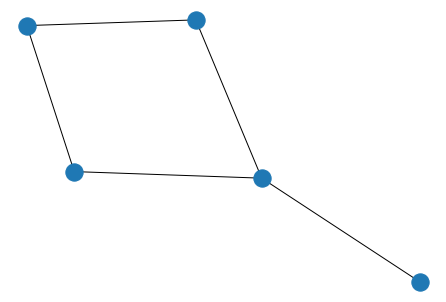

In [5]:
graph_1 = nx.Graph()
graph_1.add_edges_from(data_1)
nx.draw(graph_1)

Affichez, pour chacun des noeuds de ce graphe, son degré et la liste de ses voisins dans le graphe

In [6]:
nodes = dict()
for node1, node2 in data_1:
    nodes[node1] = nodes.get(node1,[]) + [node2]
    nodes[node2] = nodes.get(node2,[]) + [node1]
{node: (len(k),k) for node,k in nodes.items()}

{'A': (2, ['B', 'D']),
 'B': (2, ['A', 'C']),
 'C': (2, ['B', 'D']),
 'D': (3, ['A', 'E', 'C']),
 'E': (1, ['D'])}

Affichez, pour chaque paire de noeuds du graphe, un chemin menant d'un noeud à l'autre dans le graphe, s'il en existe.

In [7]:
list(nx.all_pairs_shortest_path(graph_1))

[('A',
  {'A': ['A'],
   'B': ['A', 'B'],
   'D': ['A', 'D'],
   'C': ['A', 'B', 'C'],
   'E': ['A', 'D', 'E']}),
 ('B',
  {'B': ['B'],
   'A': ['B', 'A'],
   'C': ['B', 'C'],
   'D': ['B', 'A', 'D'],
   'E': ['B', 'A', 'D', 'E']}),
 ('C',
  {'C': ['C'],
   'B': ['C', 'B'],
   'D': ['C', 'D'],
   'A': ['C', 'B', 'A'],
   'E': ['C', 'D', 'E']}),
 ('D',
  {'D': ['D'],
   'A': ['D', 'A'],
   'E': ['D', 'E'],
   'C': ['D', 'C'],
   'B': ['D', 'A', 'B']}),
 ('E',
  {'E': ['E'],
   'D': ['E', 'D'],
   'A': ['E', 'D', 'A'],
   'C': ['E', 'D', 'C'],
   'B': ['E', 'D', 'A', 'B']})]